## 1.1 Thumbtack Tossing

Consider the probability associated with a thumbtack landing point-up after being tossed. From $n$ tosses, the number of times that the tack lands point-up is denoted $y$. The true probability of landing point-up is denoted $\theta$. In this text, unknown quantities of a model or distribution are called ***parameters***.

Consider a sample in which $N=30$ and $y = 16$. Since the outcome is binary, we may reasonably treat $Y$ as a binomially-distributed random variable, realizations of which are specific values $y$. The functional form of $Y$ is then the probability mass function:
$$f(y; n, \theta) = {n \choose y} \theta^y (1-\theta)^{n-y}$$

### Frequentist Approach to Thumbtack Tossing

For a fixed $n$, we may estimate $\hat \theta$ with MLE. Intuitively, the approach simply chooses a value of $\hat \theta$ which *maximizes* the likelihood of observing the data. 
$$\hat \theta (y) = \argmax_\theta L(\theta; y)$$
The likelihood function is a function *of the parameter being estimated* conditional on the observed quantities. For this binomial random variable, it is:
$$L(\theta | n, y) = P(Y = y | \theta) = {n \choose y}\theta^y (1 - \theta)^{n-y}$$ 
If we consider each trial in the $n$ observations as an independent Bernoulli random variable $y^*$, then the likelihood is:
$$L(\theta|y^*, n) = \prod_{i=1}^n \theta(y^*_i) = \prod_{i=1}^n \theta^{y^*_i} (1-\theta)^{1-y^*_i} = {n \choose y}\theta^y (1 - \theta)^{n-y}$$
The log-likelihood is then:
$$\log L(\theta|n, y) = l(\theta|n, y) = y\log(\theta) + (n-y)\log(1 - \theta)$$
This is maximized at $\hat \theta (y) = y/n$, or $16/30$ for the observed data.

Note that ${n\choose y}$ is dropped from the log-likelihood because it is a constant and may be ignored for the pruposes of maximizing w.r.t. the parameter $\theta$.

Thus, it is generally the case that we may simply take the log of the PMF (or PDF for continuous distributions) as the log-likelihood. However, the meaning of the likelihood is different than the meaning of the PMF/PDF. Crucially, the likelihood is a function of the parameter being estimated conditioned upon the observations. Thus, the likelihood takes the observed values as fixed and treats the parameters as variables. Consequences of this are:
1. The PMF must sum to 1 across all possible oberserved outcomes
2. The likelihood function need not sum to 1 across all parameter values

***Maximum Likelihood Estimator***\
The maximum likelihood estimator is the maximum likelihood parameter estimate evaluated as a function of the random variable $Y$ instead of the observed data $y$. Effectively, it is the estimate taken over *all possible data* sets that could be observed. In this binomial case, it is:
$$\hat \theta (Y) = \frac{Y}{n}$$
The standard deviation of the maximum likelihood estimate is the ***Standard Error***, with which we may construct confidence intervals and do hypothesis testing, etc. The randomness described by the standard error and hypothesis tests comes from the observations, not from the parameter value which is taken to be an unknown constant. 

### Fully Bayesian Model

In the Bayesian framework, the parameter values are considered to be random variables themselves rather than fixed constants. The text makes this explicit by denoting the unknown parameter $\Theta$.

In the thumbtack scenario, we do not have an established a-priori judgement about the value of the success probability $\Theta$ (as we might with coin-flips). So, we may begin by quantifying our uncertainty about its value with a distribution like the uniform distribution:
$$\Theta \sim \text{U}(0, 1)$$
This is called the ***Prior Distribution*** - it is one of two components needed to fully define a Bayesian model.

The other component is the distribution of the data *given* the parameter. This is called the ***Sampling Distribution*** or the ***Likelihood***. In the binomial thumbtack tossing scenario, it is:
$$f_{Y|\Theta}(y|\theta) \rightarrow Y|\Theta \sim \text{Bin}(n, \Theta) \\ \ \\ \Theta \sim \text{U}(0,1)$$

Bayesian inference uses the sampling distribution to update the distribution of the parameter values. This is quantified by computing a ***Posterior Distribution*** of the parameter $\Theta$.\
This is the conditional distribution of $\Theta$ given the data $Y=y$:
$$f_{\Theta|Y} (\theta |y)$$

Recall the expression of the joint PMF/PDF of two random variables:
$$f_{X,Y} = f_Xf_{Y|X}$$
This may be used to factorize the joint distribution of the parameter and the data:
$$
f_{\Theta, Y} (\theta, y) = f_Y(y)f_{\Theta|y}(\theta|y) \\ \ \\
\implies f_{\Theta|Y}(\theta|y) = \frac{f_{\Theta, Y} (\theta, y)}{f_Y(y)} \\ \ \\
\implies f_{\Theta|Y}(\theta|y) = \frac{f_\Theta (\theta) f_{Y|\Theta} (y|\theta)}{f_Y(y)}
$$

This final expression is the familiar ***Bayes' Theorem***. We have already determined the two distributions used in the numerator, the only unknown left is the denominator - the independent distribution of the random variable $Y$. This is the *marginal distribution* of the data and is often called the ***Marginal Likelihood***.

For now, we may concern ourselves with the known distributions, to which the posterior distribution is *proportional*:
$$
f_{\Theta|Y}(\theta|y) \propto f_\Theta (\theta) f_{Y|\Theta} (y|\theta) = 1 \cdot {n \choose y} \theta^y (1 - \theta) ^{n - y}
$$
Dropping constants:
$$f_{\Theta|Y}(\theta|y) \propto \theta^y(1 - \theta)^{n - y}$$

Although $Y$ is a discrete random variable, $\Theta$ is continuous. So, we would like to find a known distribution that matches this functional form in order to model $\Theta$.\
Obviously the binomial distribution has this functional form, but there is also a continuous distribution with a PDF of this form, the beta distribution:
$$
x \sim \text{Beta}(\alpha, \beta) \implies f(x) = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1} \\ \ \\
B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} = \int_0^1 x^{\alpha - 1}(1 - x)^{\beta - 1}dx
$$

So, we may model the posterior distribution as:
$$\Theta|Y \sim \text{Beta}(y+1, \ n - y + 1)$$

The posterior distribution may be used to derive point estimates of the parameter, most commonly th ***Posterior Mean***:
$$E(\Theta|Y=y) = \frac{\alpha}{\alpha + \beta} = \frac{y+1}{(n-y+1) + (y+1)} = \frac{17}{32}$$

### Lil Demo

Let's run this

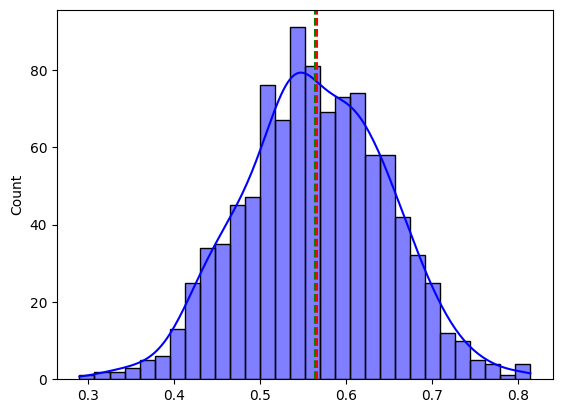

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, beta

n = 30
y = 17

mle = y / n
theta = beta.rvs(a=y + 1, b=n - y + 1, size=1000)

sns.histplot(theta, bins=30, color='blue', alpha=0.5, label='Posterior samples', kde=True)
plt.axvline(mle, color='red', linestyle='--', label='MLE')
plt.axvline(theta.mean(), color='green', linestyle='--', label='Posterior mean');

# 1.2 Components of Bayesian Inference

### Sampling Distribution / Likelihood Function

Consider the vector $\bf Y$, the random vector of the random variable $Y$. A set of observed data $\bf y$ is then a realization of this random vector $\bf Y$. We may map this more general conceptualization to the thumbtack example by considering each observation as an independent Bernoulli RV rather than considering the aggregate as a single binomial RV.

Then, if we assume that our observations are independent given a value of $\Theta$, then the joint sampling distribution of the random vector $\bf Y$ may be factorized into a product of the sampling distributions of its components:
$$
f_{\mathbf{Y}|\Theta} (\mathbf{y}|\theta) = \prod_{i=1}^n f_{Y_i|\Theta} (y_i|\theta)
$$

If they are also identically distributed (IID), then:
$$
f_{\mathbf{Y}|\Theta} (\mathbf{y}|\theta) = \prod_{i=1}^n f(y_i|\theta)
$$

### Prior Distribution

The marginal distribution of the parameter $f_\Theta(\theta)$ is called the *prior distribution*.\
In the absence of any information about the prior distribution, we should initially choose as vague a prior as possible, like the uniform distribution in the thumbtack scenario. Such choices are called ***Uninformative Priors***, while stronger priors are called ***Informative Priors***.

The prior distribution may also be parametric, with parameters $\phi = (\phi_1,...,\phi_k)$ called ***Hyperparameters***.

### Posterior Distribution

The posterior distribution is the conditional distribution given the data. 
$$
f_{\Theta|\mathbf Y}(\theta|\mathbf y) = \frac{f_\Theta (\theta) f_{\mathbf Y|\Theta} (\mathbf y|\theta)}{f_\mathbf Y(\mathbf y)}
f_{\Theta|\mathbf Y}(\theta|\mathbf y) \propto f_\Theta (\theta) f_{\mathbf Y|\Theta} (\mathbf y|\theta)
$$

### Marginal Likelihood

The marginal likelihood $f_{\mathbf Y}(\mathbf y)$ acts as a normalizing constant on the posterior distribution.

We may compute the marginal likelihood by marginalizing out the parameter from the full joint probability distribution:
$$
f_{\mathbf Y}(\mathbf y) = \int_\Omega f_{\Theta, \mathbf Y}(\theta, \mathbf y) d\theta = \int_\Omega f_\Theta(\theta) f_{\mathbf Y| \Theta}(\mathbf y |\theta) d\theta
$$
$\Omega$ denotes the parameter space of $\Theta$, e.g. $[0, 1]$ for the probability of a thumbtack landing point-up.

The marginal likelihood is sometimes called the ***prior predictive distribution*** because it presents our beliefs about the probabilities of the data before any observations are made. It may be thought of as a weighted average over all of the possible parameter values, where the weights are determined by the prior distribution of the parameter. That is:
$$
f_{\mathbf Y}(\mathbf y) = \int_\Omega f_{\mathbf Y| \Theta}(\mathbf y |\theta) f_\Theta(\theta) d\theta = E\big[f_{\mathbf Y| \Theta}(\mathbf y |\theta)\big]
$$
So, in a sense, it is the expectation of the sampling distribution taken over the prior distribution of the parameter $\Theta$.

This is most clearly observed in the discrete case where we deal with sums rather than integrals.

This is a good way to think of marginal distributions in general, it would seem.

# 1.3 Prediction

### Motivating Example, Part 2